---
title: 两股票历史价格比较
date: 2019-06-22
id: 1
categories: [Quant量化交易, 项目]
---

## 项目任务
1. 获取财务数据
2. 填充缺失值
3. 数据归一化
4. 折线图

## 代码

### 依赖

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tushare as ts
import ssl
context = ssl._create_unverified_context()

### 获取财务数据

In [2]:
s_pf = '600000'
s_gd = '601818'
sdate = '2018-01-01'
edate = '2018-12-31'

df_pf = ts.get_hist_data(s_pf, start = sdate, end = edate).sort_index(axis = 0, ascending = True)
df_gd = ts.get_hist_data(s_gd, start = sdate, end = edate).sort_index(axis = 0, ascending = True)

### 数据处理

In [3]:
df = pd.concat([df_pf.close, df_gd.close], axis = 1, keys = ['pf_clse','gd_close'])
df.ffill(axis = 0, inplace = True)

df['pf_one'] = df_pf.close / float(df_pf.close[0]) * 100
df['gd_one'] = df_gd.close / float(df_gd.close[0]) * 100

display(df.corr(method = 'pearson', min_periods = 1))

,pf_clse,gd_close,pf_one,gd_one
pf_clse,1.000000,0.912252,1.000000,0.912252
gd_close,0.912252,1.000000,0.912252,1.000000
pf_one,1.000000,0.912252,1.000000,0.912252
gd_one,0.912252,1.000000,0.912252,1.000000


### 画图

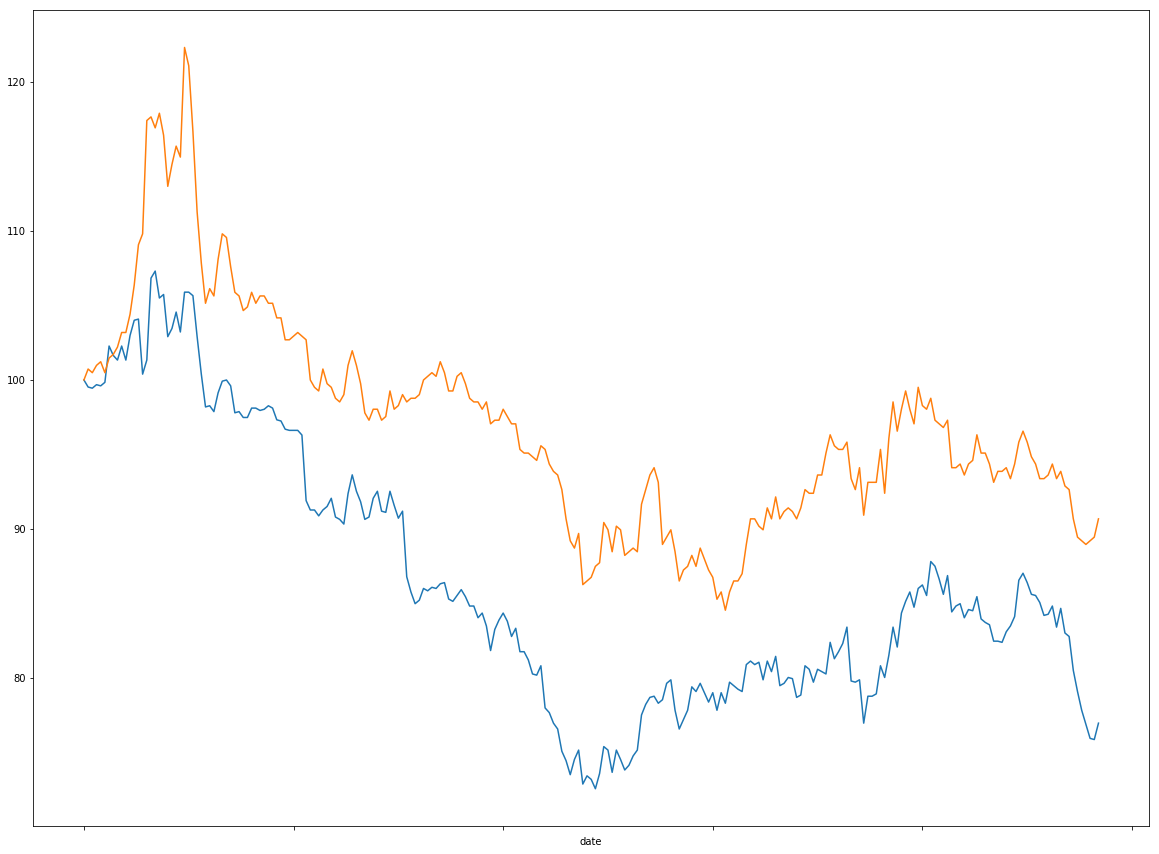

In [5]:
df.pf_one.plot(figsize = (20,15))
df.gd_one.plot(figsize = (20,15))

> 参考：

1. [廖雪峰Python数据分析](https://www.julyedu.com/course/getDetail/66/)
2. [Tushare官网](http://tushare.org/)